## Visualizing complex numbers

In [7]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### An Example

Consider the complex number $ z = 1 + \sqrt{3} i $.

In [6]:
z=1+np.sqrt(3)*1j
z

(1+1.7320508075688772j)

In [26]:
z.real, z.imag

(1.0, 1.7320508075688772)

In [23]:
zc=z.conj()

In [19]:
np.sqrt(z*zc)

(1.9999999999999998+0j)

In [20]:
abs(z)

1.9999999999999998

In [22]:
z.conj

(1-1.7320508075688772j)

### Adding, subtracting and multiplying comple numbers

In [67]:
z1 = 2-1j
z2 = 1+7j

In [73]:
z1+z2   # Try adding, multiplying, dividing z1 and z2

(3+6j)

In [75]:
np.sqrt(z1+z2)

(2.2032026611843234+1.3616541287161306j)

### Cartesian representation

Text(0,0.5,'Im(z)')

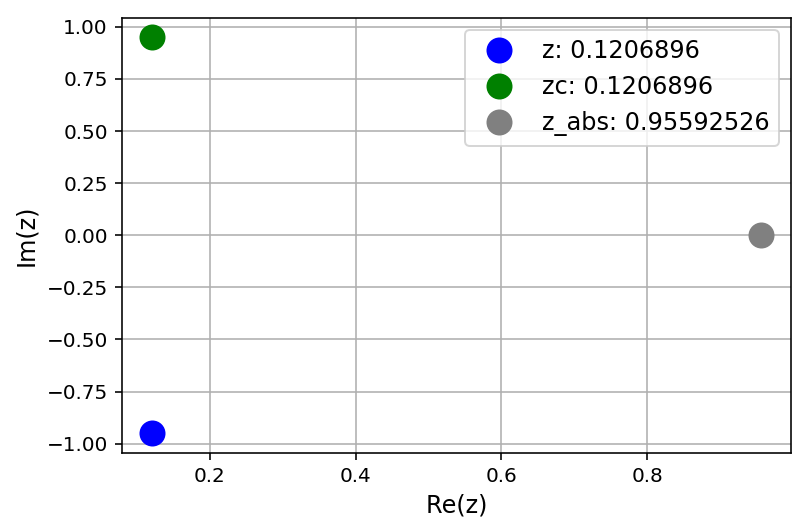

In [11]:
# Specify your complex number here. Feel free to modify
z = 1j/(3+7j)-1j

# Compute conjugate, absolute values
zc = z.conjugate()
z_abs = abs(z)


### Plot

plt.plot(z.real, z.imag, 'o',ms=12, color='blue') 

plt.plot(zc.real, zc.imag, 'o', ms=12, color='green') 

plt.plot(z_abs.real, z_abs.imag, 'o', ms=12, color='grey') 


#Plot grid and specify a legend

plt.grid('on')
plt.legend(["z: " + str(z)[1:10], "zc: " + str(zc)[1:10], "z_abs: " + str(z_abs)[:10]], fontsize=12)
plt.xlabel("Re(z)", fontsize=12)
plt.ylabel("Im(z)", fontsize=12)

Let’s use Python to convert the trigonometric form of the complex number
$z$ to polar form and that visualize on a polar plot. 

For  $z = 1 + \sqrt{3} i $, $ x = 1 $, $ y = \sqrt{3}$.

It follows that $r = 2$ and
$\theta = \tan^{-1}(\sqrt{3}) = \frac{\pi}{3} = 60^o$.

In [136]:
import cmath  # python provides special methods to convert between representtions 

In [83]:
z=1+np.sqrt(3)*1j 
z

(1+1.7320508075688772j)

In [84]:
cmath.polar(z) # get the polar form

(1.9999999999999998, 1.0471975511965976)

In [138]:
r=cmath.polar(z)[0] 
theta=cmath.polar(z)[1]

r, theta

(1.9999999999999998, 1.0471975511965976)

In [82]:
cmath.rect(1.9999999999999998, 1.0471975511965976)

(1+1.732050807568877j)

### Polar plot of complex numbers

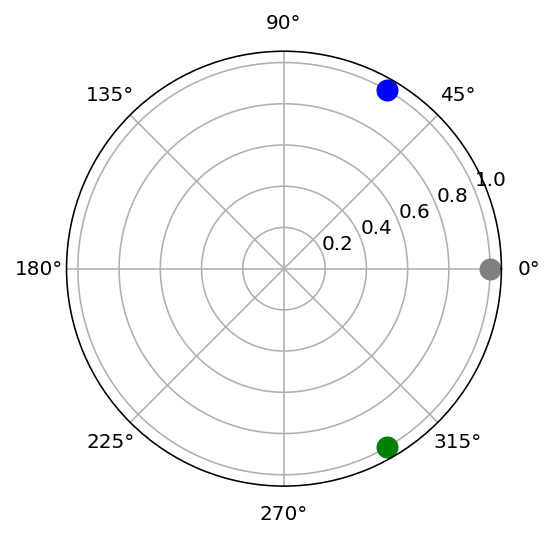

In [135]:
# Specify complex number either by z or directly pecify r and theta

#z = 1+np.sqrt(3)*1j

r = 1         # cmath.polar(z)[0]                         
θ = np.pi/3   # cmath.polar(z)[1] 


# Plot
fig = plt.figure()
ax = plt.subplot(projection='polar')

ax.plot( θ,r, 'o', ms=10,color='blue')     # complex number    z     
ax.plot(-θ,r, 'o', ms=10,color='green')    # complex conjugate z
ax.plot( 0,r, 'o', ms=10, color='grey')

**With a few more options we can annote the plot to show connection with cartesian representation**

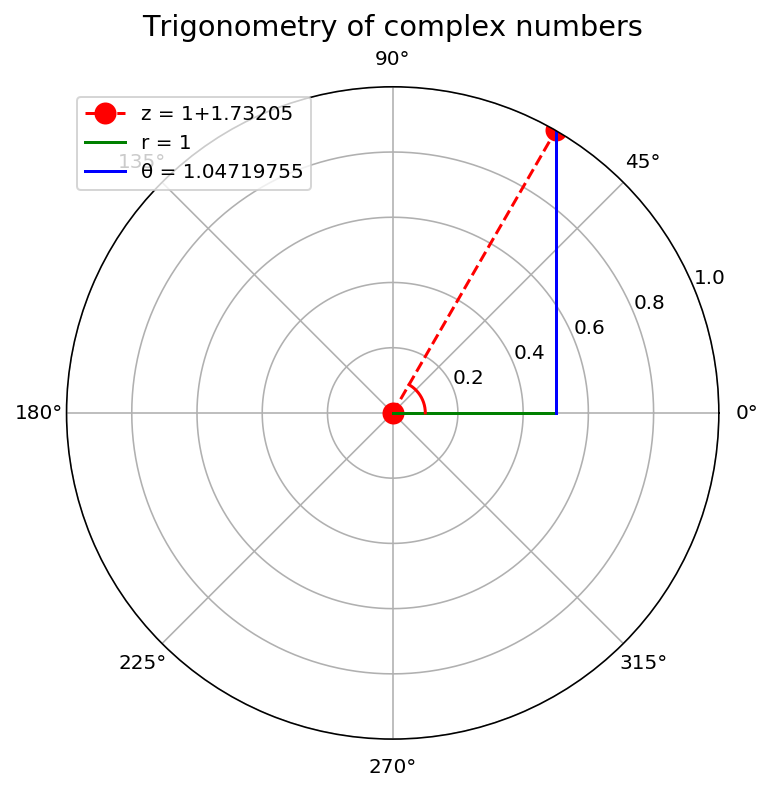

In [168]:
# Set parameters
r = 1
θ = np.pi/3
x = r * np.cos(θ)

# Plot
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(projection='polar')

ax.plot((0, θ),(0, r), '--o', color='red',ms=10)               # plot r


### Plot lines and annotate
x_range = np.linspace(0, x, 1000)
θ_range = np.linspace(0, θ, 1000)

ax.plot(np.zeros(x_range.shape), x_range, color='green')       # plot x
ax.plot(θ_range, x / np.cos(θ_range), color='blue')            # plot y
ax.plot(θ_range, np.ones(θ_range.shape) * 0.1, color='r')      # plot θ

ax.set_title("Trigonometry of complex numbers", va='bottom', fontsize='x-large')

ax.set_rmax(r)

ax.legend(["z = " + str(z)[1:10],  "r = " + str(r), "θ = " + str(θ)[:10] ])

## Sympy and complex numbers

Below we will use symbolic python to derive Euler's relation by expanding sines, conse and exp in Taylor series. If you have used Mathematica, WolframAlpha, or another math software that uses symbols, then Sympy is essentially a Python version of that. The central objects in Sympy are variables which we define and then do symbolic operations such as expand in series, differentiate, simplify expression, integrate etc. 

In [1]:
from sympy import *

In [2]:
x = Symbol('x', real=True)
y = Symbol('y', real=True)
z = Symbol('z', complex=True)
n = Symbol('n', real=True)

In [3]:
exp(x).series(x,0,4)                        # Taylor expand to power 4

1 + x + x**2/2 + x**3/6 + O(x**4)

In [16]:
a=cos(x).series(x,0,4)
a

1 - x**2/2 + O(x**4)

In [17]:
b = I*sin(y).series(y,0,4) 
b

I*(y - y**3/6 + O(y**4))

In [18]:
(a+b).simplify()         # simplify an expression

1 + I*y - I*y**3/6 - x**2/2 + O(y**4) + O(x**4)

Now let us use Sympy to evaluate 
$\int_{-\pi}^{\pi} \cos(nx) \sin(nx) \, d\omega$


In [28]:
integrate(cos(n*x)*sin(n*x), (x, -pi, pi))  # evaluate integral of cos(nx)sin(nx)

## Complex numbers and Julia sets and fractals.

- **Fractal** is a mathematically defined, self-similar object which has similarity and symmetry on a variety of scales. The Julia Set Fractal is a type of fractal defined by the behavior of a function that operates on input complex numbers. More explicitly, upon iterative updating of input complex number, the Julia Set Fractal represents the set of inputs whose resulting outputs either tend towards infinity or remain bounded. <br><br>
- **Julia set fractals** are normally generated by initializing a complex number  $z = x + yi$  where  $i^2 = -1$  and x and y are image pixel coordinates in the range of about -2 to 2. Then, z is repeatedly updated using:  $z = z^2 + c$  where c is another complex number that gives a specific Julia set. After numerous iterations, if the magnitude of z is less than 2 we say that pixel is in the Julia set and color it accordingly. Performing this calculation for a whole grid of pixels gives a fractal image.

In [ ]:
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=(8,8))

# Image width and height; parameters for the plot
im_width, im_height = 500, 500

c = complex(-0.1, 0.65)

zabs_max = 10
nit_max = 1000

xmin, xmax = -1.5, 1.5
xwidth = xmax - xmin

ymin, ymax = -1.5, 1.5
yheight = ymax - ymin

julia = np.zeros((im_width, im_height))

for ix in range(im_width):
    for iy in range(im_height):
        
        nit = 0
        
        # Map pixel position to a point in the complex plane
        z = complex(ix / im_width * xwidth + xmin,
                    iy / im_height * yheight + ymin)

        # Do the iterations
        while abs(z) <= zabs_max and nit < nit_max:
            z = z**2 + c
            nit += 1
            
        shade = 1-np.sqrt(nit / nit_max)
        ratio = nit / nit_max
        julia[ix,iy] = ratio


#ax.imshow(julia, interpolation='nearest', cmap=cm.hot)  #try cm.jet, cm.hot, cm.rainbow, etc